In [71]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
from datetime import datetime
import seaborn as sns


In [54]:
data= pd.read_csv('./Input/movies.csv')
ratings=pd.read_csv('./Input/ratings.csv',sep=',')
tags = pd.read_csv('./Input/tags.csv',sep=',')
print(data.shape)
data.head()


(27278, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Number of unique movies and ratings 


In [55]:
movies = data['movieId'].unique().tolist()
print('Number of movies =',len(movies))
print('Number of ratings =',ratings.shape[0])




Number of movies = 27278
Number of ratings = 1048575


### Summary of ratings 

In [56]:
ratings.rating.describe()

count    1.048575e+06
mean     3.529272e+00
std      1.051919e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

### Cleaning Data 


In [57]:
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [58]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [59]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [60]:
tags = tags.dropna()
unique_tags = tags['tag'].unique().tolist()
len(unique_tags)

38643

In [61]:
#merging two dataframes "movies.csv" and "ratings.csv"
merged=data.merge(ratings,on = 'movieId',how = 'inner')
merged.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [62]:
low_rated = merged['rating']<4.0
merged[low_rated].tail()


,movieId,title,genres,userId,rating,timestamp
1048568,130052,Clown (2014),Drama|Horror,3858,1.0,1426949476
1048569,130073,Cinderella (2015),Adventure|Children|Drama|Sci-Fi,4450,2.5,1427591774
1048572,130490,Insurgent (2015),Action|Romance|Sci-Fi,2423,1.0,1426887819
1048573,130490,Insurgent (2015),Action|Romance|Sci-Fi,3397,3.5,1427491739
1048574,130642,Backcountry (2014),Drama|Horror|Thriller,3858,3.0,1427138517


In [63]:
#top 25 most rated movies
most_rated = merged.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head()


title
Pulp Fiction (1994)                 3498
Forrest Gump (1994)                 3476
Silence of the Lambs, The (1991)    3247
Shawshank Redemption, The (1994)    3216
Jurassic Park (1993)                3129
dtype: int64

In [64]:
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)


In [65]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences





[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

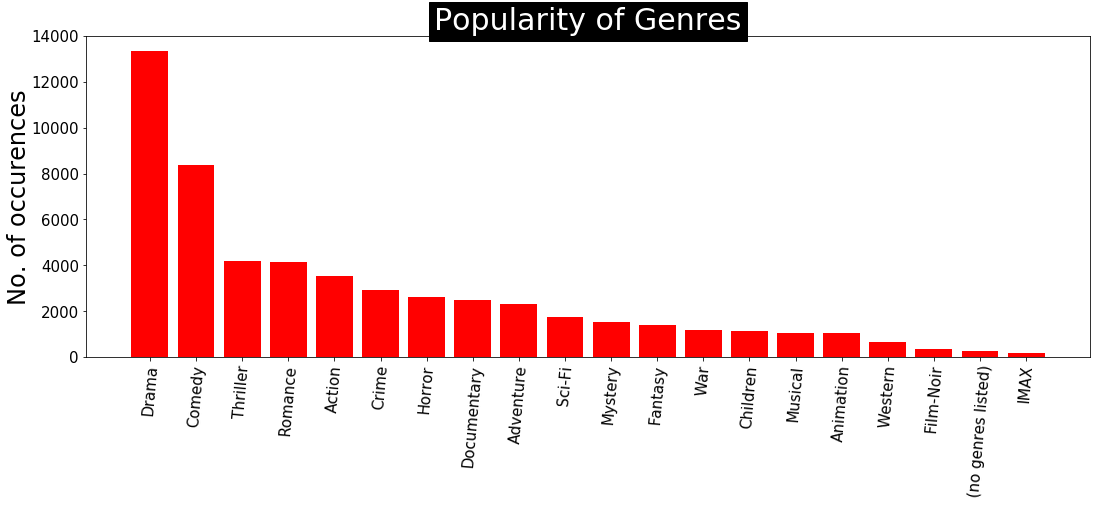

In [66]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in keyword_occurences]
x_axis = [k for k,i in enumerate(keyword_occurences)]
x_label = [i[0] for i in keyword_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In [75]:
#ratings['timestamp'] = ratings['timestamp'].apply(datetime.fromtimestamp)
ratings['year'] = ratings['timestamp'].dt.year
ratings['month'] = ratings['timestamp'].dt.month
ratings = ratings.sort_values('timestamp')

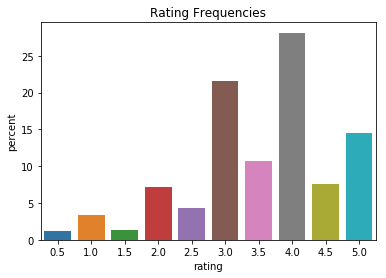

In [76]:
norm_counts = (
    ratings['rating']
    .value_counts(normalize=True, sort=False)
    .multiply(100)
    .reset_index()
    .rename(columns={'rating': 'percent', 'index': 'rating'})
)
ax = sns.barplot(x='rating', y='percent', data=norm_counts)
ax.set_title('Rating Frequencies')
plt.show()

,year,month,Rating,std
Date,,,,
1996-02-01,1996,2,3.777778,1.481366
1996-03-01,1996,3,3.839623,1.123194
1996-04-01,1996,4,3.689360,1.055416
1996-05-01,1996,5,3.525193,1.006101
1996-06-01,1996,6,3.553571,1.000492
1996-07-01,1996,7,3.578500,0.972812
1996-08-01,1996,8,3.526077,0.970353
1996-09-01,1996,9,3.530012,0.994549
1996-10-01,1996,10,3.562109,1.012542


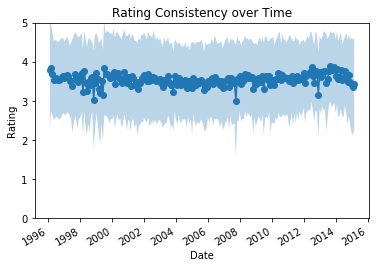

In [77]:

# <!-- collapse=True -->
month_counts = ratings.groupby(['year', 'month'])['rating'].agg([np.mean, np.std])
month_counts = month_counts.rename(index=str, columns={'mean': 'Rating'})
month_counts = month_counts.reset_index()
month_counts['Date'] = month_counts[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)
month_counts = month_counts.set_index('Date', drop=True)
display(month_counts)
month_counts['Rating'].plot(style='o-')
plt.fill_between(month_counts.index,
                 month_counts['Rating'] - month_counts['std'],
                 month_counts['Rating'] + month_counts['std'],
                 alpha=0.3,
                )
plt.ylim([0, 5])
plt.ylabel('Rating')
plt.gca().grid(which='minor')
plt.title('Rating Consistency over Time')
plt.show()

In [78]:
from cf_utils import get_rating_matrix
rating_matrix, user_map, item_map = get_rating_matrix(ratings)
with plt.style.context('seaborn-white'):
    rating_matrix_binary = rating_matrix > 0
    plt.imshow(rating_matrix_binary)
    plt.xlabel('Movie')
    plt.ylabel('User')
    plt.show()

Markdown(
    r"The matrix density is $n_{{ratings}}/(n_{{users}} \times n_{{movies}}) = {:0.3f}$"
    .format(np.sum(rating_matrix_binary) / np.prod(rating_matrix.shape))
)


ModuleNotFoundError: No module named 'cf_utils'

In [81]:
!pip install cf-python



  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000203AFF957B8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/cf-python/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000203AFF95668>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/cf-python/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000203AFF95898>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/cf-python/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, sta